In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = {'keyword_query': ['query1', 'query2', 'query3'],
        'Incident_Label': [1, 0, 1],
        'pos_score': [0.5, 0.2, 0.8],
        'neg_score': [0.3, 0.1, 0.1],
        'neu_score': [0.2, 0.7, 0.1]}
df = pd.DataFrame(data)

# set index to keyword_query
df.set_index('keyword_query', inplace=True)

In [ ]:
fig, axs = plt.subplots(nrows=len(df), ncols=1, figsize=(10, 20))
for i, (query, row) in enumerate(df.iterrows()):
    ax = axs[i]
    width = 0.35

    # create bar chart for Incident_Label = 0
    ax.bar(0, row[['pos_score', 'neg_score', 'neu_score']].values[0], width, bottom=0, color=['g', 'r', 'b'], alpha=0.5)

    # create bar chart for Incident_Label = 1
    ax.bar(width, row[['pos_score', 'neg_score', 'neu_score']].values[1], width, bottom=0, color=['g', 'r', 'b'], alpha=0.5)

    ax.set_title(query)
    ax.set_xticks([0, width])
    ax.set_xticklabels(['Incident_Label 0', 'Incident_Label 1'])
    ax.set_ylim([0, 1])
    ax.legend(['Positive', 'Negative', 'Neutral'])
    ax.set_ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

<ipython-input-20-e93abe8ccac5>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='keyword_query', y='value', hue='sentiment', col='Incident_Label', data= melted_df, kind='bar', ci=None, height=6, aspect=1, dodge=False)


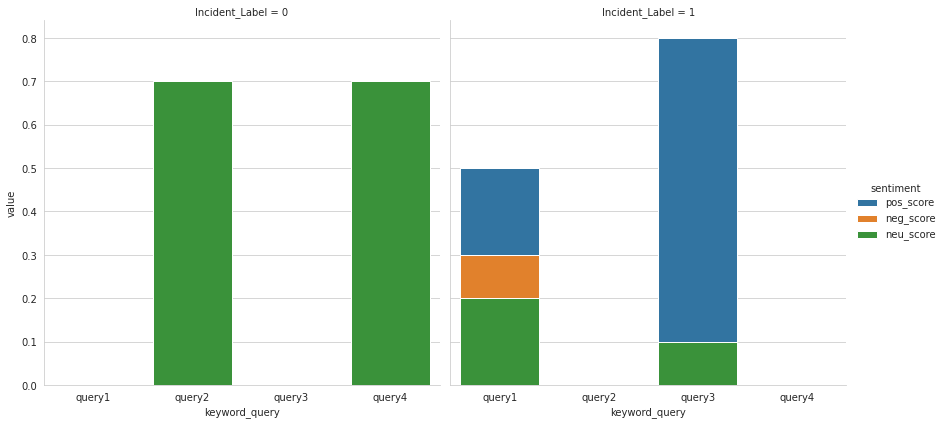

In [ ]:
import seaborn as sns

# create sample dataframe
data = {'keyword_query': ['query1', 'query2', 'query3', 'query4'],
        'Incident_Label': [1, 0, 1, 0],
        'pos_score': [0.5, 0.2, 0.8, 0.1],
        'neg_score': [0.3, 0.1, 0.1, 0.2],
        'neu_score': [0.2, 0.7, 0.1, 0.7]}
df = pd.DataFrame(data)

# melt the dataframe to long format
melted_df = pd.melt(df, id_vars=['keyword_query', 'Incident_Label'], value_vars=['pos_score', 'neg_score', 'neu_score'], var_name='sentiment')

# plot the double bar chart with stacked bars
sns.catplot(x='keyword_query', y='value', hue='sentiment', col='Incident_Label', data= melted_df, kind='bar', ci=None, height=6, aspect=1, dodge=False)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


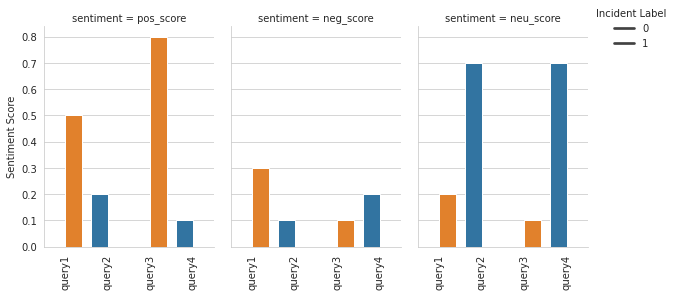

In [ ]:
melted_df = pd.melt(df, id_vars=['keyword_query', 'Incident_Label'], value_vars=['pos_score', 'neg_score', 'neu_score'], var_name='sentiment')

# create stacked double bar chart
sns.set_style("whitegrid")
g = sns.catplot(x="keyword_query", y="value", hue="Incident_Label", col="sentiment", data=melted_df, kind="bar", height=4, aspect=0.7, legend=False)
g.set_xticklabels(rotation=90)
g.set_axis_labels("", "Sentiment Score")
g.fig.subplots_adjust(wspace=0.1, hspace=0.4)
g.add_legend(title="Incident Label", loc='upper right', labels=["0", "1"])

# show the plot
plt.show()

In [ ]:
melted_df

,keyword_query,Incident_Label,sentiment,value
0,query1,1,pos_score,0.5
1,query2,0,pos_score,0.2
2,query3,1,pos_score,0.8
3,query4,0,pos_score,0.1
4,query1,1,neg_score,0.3
5,query2,0,neg_score,0.1
6,query3,1,neg_score,0.1
7,query4,0,neg_score,0.2
8,query1,1,neu_score,0.2
9,query2,0,neu_score,0.7


In [ ]:
df = pd.DataFrame({
    'keyword_query': ['q1', 'q1', 'q2', 'q2'],
    'Incident_Label': [0, 1, 0, 1],
    'pos': [10, 20, 30, 40],
    'neg': [5, 15, 25, 35],
    'neu': [85, 65, 45, 25]
})

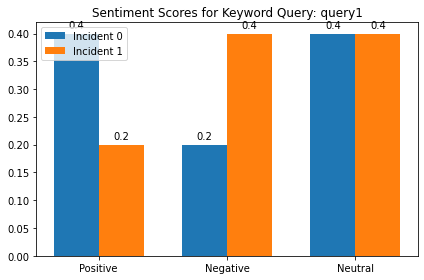

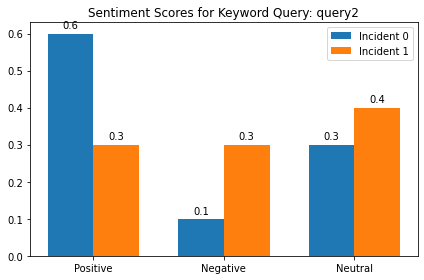

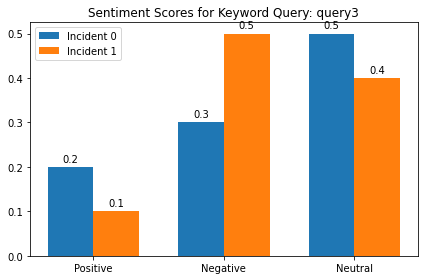

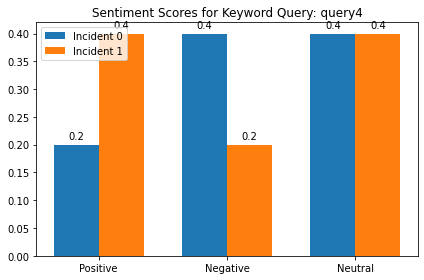

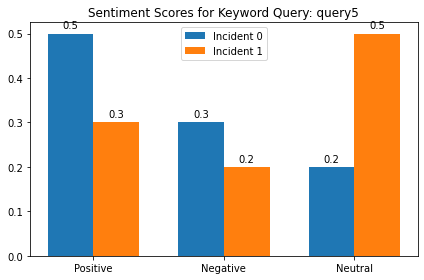

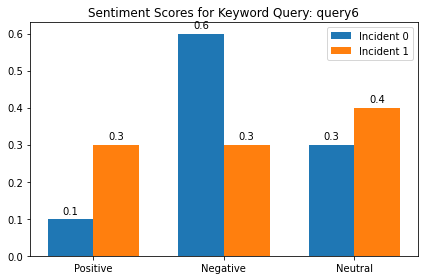

In [ ]:
incident_label = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
keyword_query = ['query1', 'query1', 'query2', 'query2', 'query3', 'query3', 'query4', 'query4', 'query5', 'query5', 'query6', 'query6']
sentiment_scores = [[0.4, 0.2, 0.4], [0.2, 0.4, 0.4], [0.6, 0.1, 0.3], [0.3, 0.3, 0.4], [0.2, 0.3, 0.5], [0.1, 0.5, 0.4], [0.2, 0.4, 0.4], [0.4, 0.2, 0.4], [0.5, 0.3, 0.2], [0.3, 0.2, 0.5], [0.1, 0.6, 0.3], [0.3, 0.3, 0.4]]

# group the data by keyword query and incident label
data = {}
for i in range(len(keyword_query)):
    key = keyword_query[i]
    if key not in data:
        data[key] = {'incident_0': [], 'incident_1': []}
    if incident_label[i] == 0:
        data[key]['incident_0'].append(sentiment_scores[i])
    else:
        data[key]['incident_1'].append(sentiment_scores[i])

means = {}
for key in data.keys():
    means[key] = {}
    means[key]['incident_0'] = np.mean(data[key]['incident_0'], axis=0)
    means[key]['incident_1'] = np.mean(data[key]['incident_1'], axis=0)

# plot the stacked double bar graph for each keyword query
labels = ['Positive', 'Negative', 'Neutral']
x = np.arange(len(labels))
width = 0.35

for i, key in enumerate(data.keys()):
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, means[key]['incident_0'], width, label='Incident 0')
    rects2 = ax.bar(x + width/2, means[key]['incident_1'], width, label='Incident 1')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.set_title(f'Sentiment Scores for Keyword Query: {key}')
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.show()


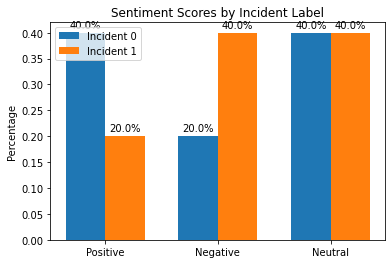

In [ ]:

# create dummy data
incident_label = [0, 1, 0, 1, 0, 1]
keyword_query = ['query1', 'query2', 'query3', 'query4', 'query5', 'query6']
sentiment_scores = [[0.4, 0.2, 0.4], [0.2, 0.4, 0.4], [0.6, 0.1, 0.3], [0.3, 0.3, 0.4], [0.2, 0.3, 0.5], [0.1, 0.5, 0.4]]

# group the data by incident label
incident_0 = [sentiment_scores[i] for i in range(len(sentiment_scores)) if incident_label[i] == 0]
incident_1 = [sentiment_scores[i] for i in range(len(sentiment_scores)) if incident_label[i] == 1]

# calculate the average sentiment scores for each incident label
incident_0_mean = np.mean(incident_0, axis=0)
incident_1_mean = np.mean(incident_1, axis=0)

# plot the stacked double bar graph
labels = ['Positive', 'Negative', 'Neutral']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, incident_0_mean, width, label='Incident 0')
rects2 = ax.bar(x + width/2, incident_1_mean, width, label='Incident 1')

ax.set_ylabel('Percentage')
ax.set_title('Sentiment Scores by Incident Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add the percentage values to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
incident_label = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
keyword_query = ['query1', 'query1', 'query2', 'query2', 'query3', 'query3', 'query4', 'query4', 'query5', 'query5', 'query6', 'query6']
sentiment_scores = [[0.4, 0.2, 0.4], [0.2, 0.4, 0.4], [0.6, 0.1, 0.3], [0.3, 0.3, 0.4], [0.2, 0.3, 0.5], [0.1, 0.5, 0.4], [0.2, 0.4, 0.4], [0.4, 0.2, 0.4], [0.5, 0.3, 0.2], [0.3, 0.2, 0.5], [0.1, 0.6, 0.3], [0.3, 0.3, 0.4]]

# group the data by keyword query and incident label
data = {}
for i in range(len(keyword_query)):
    key = keyword_query[i]
    if key not in data:
        data[key] = {'incident_0': [], 'incident_1': []}
    if incident_label[i] == 0:
        data[key]['incident_0'].append(sentiment_scores[i])
    else:
        data[key]['incident_1'].append(sentiment_scores[i])

# calculate the means for each group
means = {}
for key in data.keys():
    means[key] = {}
    incident_0_mean = np.mean(data[key]['incident_0'], axis=0)
    incident_1_mean = np.mean(data[key]['incident_1'], axis=0)
    bottom = np.zeros(len(incident_0_mean))
    stacked_means = []
    for i in range(len(incident_0_mean)):
        stacked_means.append([incident_0_mean[i], incident_1_mean[i]])
    means[key] = stacked_means

# plot the stacked bar graph for each keyword query
labels = ['Positive', 'Negative', 'Neutral']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
for i, key in enumerate(means.keys()):
    ax.bar(x + i*width, means[key], width, label=key)
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels)
ax.legend()
ax.set_title('Sentiment Scores for Keyword Queries')
ax.bar_label(ax.containers[0], padding=3)
ax.bar_label(ax.containers[1], padding=3)
ax.bar_label(ax.containers[2], padding=3)
plt.show()

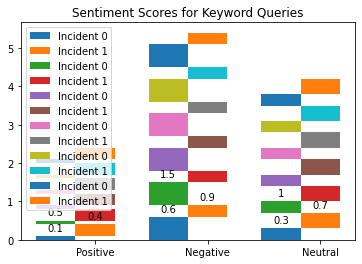

In [ ]:
incident_label = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
keyword_query = ['query1', 'query1', 'query2', 'query2', 'query3', 'query3', 'query4', 'query4', 'query5', 'query5', 'query6', 'query6']
sentiment_scores = [[0.4, 0.2, 0.4], [0.2, 0.4, 0.4], [0.6, 0.1, 0.3], [0.3, 0.3, 0.4], [0.2, 0.3, 0.5], [0.1, 0.5, 0.4], [0.2, 0.4, 0.4], [0.4, 0.2, 0.4], [0.5, 0.3, 0.2], [0.3, 0.2, 0.5], [0.1, 0.6, 0.3], [0.3, 0.3, 0.4]]

data = {}
for i in range(len(keyword_query)):
    key = keyword_query[i]
    if key not in data:
        data[key] = {'incident_0': [], 'incident_1': []}
    if incident_label[i] == 0:
        data[key]['incident_0'].append(sentiment_scores[i])
    else:
        data[key]['incident_1'].append(sentiment_scores[i])

# calculate the means for each group
means = {}
for key in data.keys():
    means[key] = {}
    incident_0_mean = np.mean(data[key]['incident_0'], axis=0)
    incident_1_mean = np.mean(data[key]['incident_1'], axis=0)
    bottom = np.zeros(len(incident_0_mean))
    stacked_means0 = []
    stacked_means1 = []
    for i in range(len(incident_0_mean)):
        stacked_means0.append(incident_0_mean[i])
        stacked_means1.append(incident_1_mean[i])

# plot the stacked bar graph for each keyword query
labels = ['Positive', 'Negative', 'Neutral']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
for i, key in enumerate(means.keys()):
    ax.bar(x - width/2, stacked_means0, width, label='Incident 0', bottom = bottom)
    bottom += stacked_means0
    ax.bar(x + width/2, stacked_means1, width, label='Incident 1', bottom = bottom)
    bottom += stacked_means1
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels)
ax.legend()
ax.set_title('Sentiment Scores for Keyword Queries')
ax.bar_label(ax.containers[0], padding=3)
ax.bar_label(ax.containers[1], padding=3)
ax.bar_label(ax.containers[2], padding=3)
plt.show()

In [ ]:
import pandas as pd

data = {'keyword_query': ['query1', 'query2', 'query3', 'query4'],
        'Incident_Label': [1, 0, 1, 0],
        'pos_score': [-0.5, 0.2, 0.8, -0.1],
        'neg_score': [0.3, 0.1, 0.1, 0.2],
        'neu_score': [0.2, 0.7, 0.1, 0.7]}
df = pd.DataFrame(data)

In [ ]:
df

,keyword_query,Incident_Label,pos_score,neg_score,neu_score
0,query1,1,-0.5,0.3,0.2
1,query2,0,0.2,0.1,0.7
2,query3,1,0.8,0.1,0.1
3,query4,0,-0.1,0.2,0.7


<ipython-input-5-0e585d6e80d9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='keyword_query', y='value', hue='sentiment', col='Incident_Label', data= melted_df, kind='bar', ci=None, height=6, aspect=1, dodge=True)


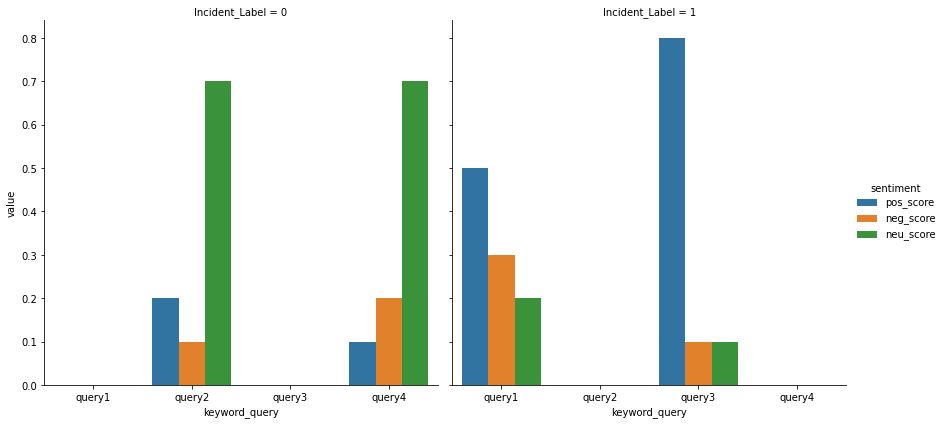

In [ ]:
import seaborn as sns

melted_df = pd.melt(df, id_vars=['keyword_query', 'Incident_Label'], value_vars=['pos_score', 'neg_score', 'neu_score'], var_name='sentiment')
sns.catplot(x='keyword_query', y='value', hue='sentiment', col='Incident_Label', data= melted_df, kind='bar', ci=None, height=6, aspect=1, dodge=True)

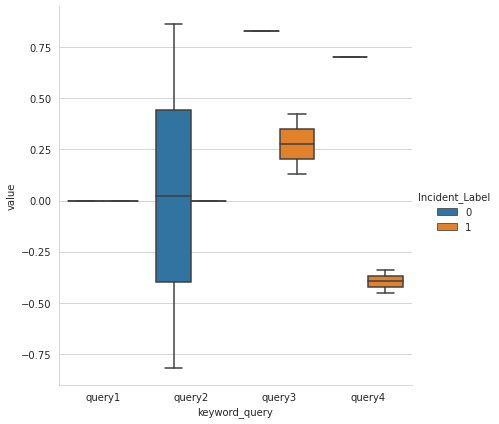

In [ ]:
import seaborn as sns

melted_df = pd.melt(df, id_vars=['keyword_query', 'Incident_Label'], value_vars = 'compound_score')
sns.catplot(x='keyword_query', y='value', hue='Incident_Label', data= melted_df, kind='box', ci=None, height=6, aspect=1, dodge=True)

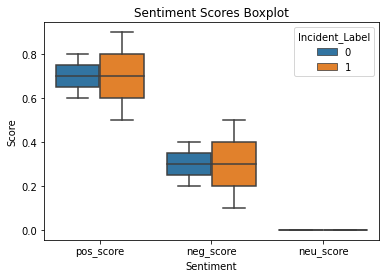

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'tweet_date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
                   'Incident_Label': [0, 1, 0, 1],
                   'pos_score': [0.8, 0.5, 0.6, 0.9],
                   'neg_score': [0.2, 0.5, 0.4, 0.1],
                   'neu_score': [0.0, 0.0, 0.0, 0.0]})

# melt the dataframe
df_melted = df.melt(id_vars=['tweet_date', 'Incident_Label'], var_name='Sentiment', value_name='Score')

# create the boxplot
sns.boxplot(x='Sentiment', y='Score', hue='Incident_Label', data=df_melted)

# set the title and labels
plt.title('Sentiment Scores Boxplot')
plt.xlabel('Sentiment')
plt.ylabel('Score')

# show the plot
plt.show()

In [ ]:
df = pd.DataFrame({'keyword_query': ['query1', 'query2', 'query3', 'query4', 'query1', 'query2', 'query3', 'query4', 'query4', 'query2', 'query3'],
                   'Incident_Label': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
                   'compound_score': [0.0, 0.0, 0.8311, -0.3384, 0.0, 0.8658, 0.4215, 0.7003, -0.4517, -0.8176, 0.128],
                   })
df

,keyword_query,Incident_Label,compound_score
0,query1,0,0.0000
1,query2,1,0.0000
2,query3,0,0.8311
3,query4,1,-0.3384
4,query1,1,0.0000
5,query2,0,0.8658
6,query3,1,0.4215
7,query4,0,0.7003
8,query4,1,-0.4517
9,query2,0,-0.8176


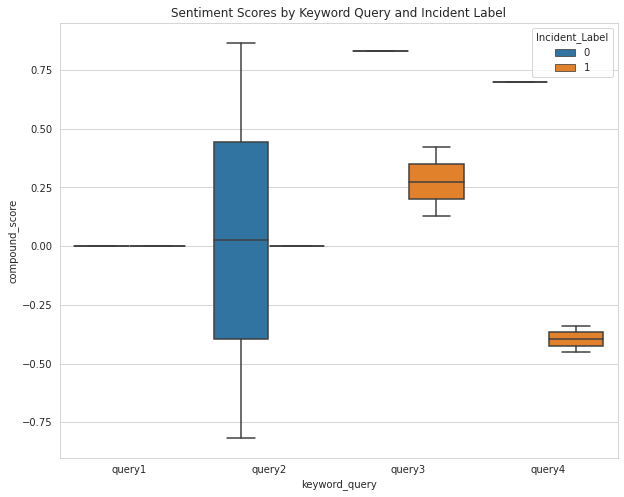

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
sns.boxplot(x='keyword_query', y='compound_score', hue='Incident_Label', data=df)
plt.title('Sentiment Scores by Keyword Query and Incident Label')
plt.show()

In [ ]:
from google.colab import drive
from google.colab import files

uploaded = files.upload()

Saving maindata_vadersentiments.csv to maindata_vadersentiments (1).csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['maindata_vadersentiments.csv']), lineterminator='\n')
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [ ]:
import ast

df['Vader_Scores'] = df['Vader_Scores'].apply(lambda x: ast.literal_eval(x))
df[['neg', 'neu', 'pos', 'compound']] = df['Vader_Scores'].apply(lambda x: pd.Series([x['neg'], x['neu'], x['pos'], x['compound']]))
df1 = df.drop(columns = ['Vader_Scores'], axis = 1)

In [ ]:
df1['Tweet_Date'] = pd.to_datetime(df1['Tweet_Date'])

In [ ]:
no_years = df1['Tweet_Date'].dt.year.unique()
no_years

years_df = []
for i, yr in enumerate(no_years):
  yr_df = df1.loc[df1['Tweet_Date'].dt.year == yr]
  yr_df = yr_df.reset_index()
  print(f"{yr} dataframe")
  years_df.append(yr_df)

2022 dataframe
2020 dataframe
2023 dataframe
2021 dataframe
2019 dataframe
2018 dataframe
2017 dataframe
2016 dataframe
2015 dataframe
2014 dataframe
2013 dataframe
2012 dataframe
2011 dataframe
2010 dataframe
2009 dataframe


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharex=True)

for idx, year in enumerate(years_df):
    grouped = year.groupby(['Vader_sentiment', 'Tweet_Date', 'Incident_Label'])['compound'].mean()

    sentiments = grouped.index.levels[0]
    dates = grouped.index.levels[1]

    score_matrix0 = np.zeros((len(sentiments), len(dates)))
    score_matrix1 = np.zeros((len(sentiments), len(dates)))

    for i, sentiment in enumerate(sentiments):
        for j, date in enumerate(dates):
            if (sentiment, date, 0) in grouped.index:
                score_matrix0[i,j] = grouped[(sentiment, date, 0)]
            if (sentiment, date, 1) in grouped.index:
                score_matrix1[i,j] = grouped[(sentiment, date, 1)]

            ax1.stackplot(dates, score_matrix0, labels=sentiments)
            ax2.stackplot(dates, score_matrix1, labels=sentiments)

    ax1.set_title(f"Year {idx+1}")

ax1.legend(loc='upper left')
fig.tight_layout()
plt.show()

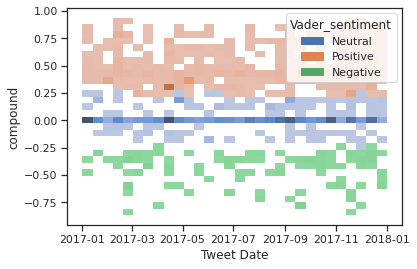

In [ ]:
sns.histplot(data= years_df[6], x='Tweet_Date', y = 'compound', hue='Vader_sentiment', multiple='stack', bins=30)
plt.xlabel('Tweet Date')
plt.show()

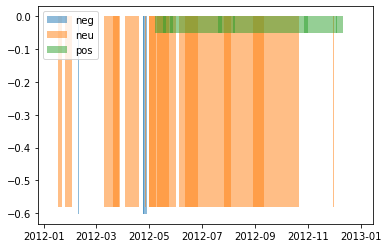

In [ ]:
import pandas as pd

grouped_data = years_df[11].groupby('Vader_sentiment')['compound'].mean()
cum_sum = grouped_data.cumsum()

df_1 = pd.DataFrame()
df_1['cumul_sum'] = years_df[11]['Vader_sentiment'].map(cum_sum)

fig, ax = plt.subplots()
ax.fill_between(years_df[11]['Tweet_Date'], 0, df_1['cumul_sum'], where = years_df[11]['Vader_sentiment'] == 'Negative', label = 'neg', alpha = 0.5)
ax.fill_between(years_df[11]['Tweet_Date'], 0, df_1['cumul_sum'], where = years_df[11]['Vader_sentiment'] == 'Neutral', label = 'neu', alpha = 0.5)
ax.fill_between(years_df[11]['Tweet_Date'], 0, df_1['cumul_sum'], where = years_df[11]['Vader_sentiment'] == 'Positive', label = 'pos', alpha = 0.5)

ax.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df1.groupby(['Vader_sentiment', 'Tweet_Date'])['compound'].mean()

# Extract the unique sentiment categories and tweet dates from the grouped data
sentiments = grouped.index.levels[0]
dates = grouped.index.levels[1]

# Create a matrix of sentiment scores for each sentiment category and tweet date
score_matrix = np.zeros((len(sentiments), len(dates)))
for i, sentiment in enumerate(sentiments):
    for j, date in enumerate(dates):
        if (sentiment, date) in grouped.index:
            score_matrix[i,j] = grouped[(sentiment, date)]

# Plot the stackplot
sns.set_theme(style = "ticks")
fig, ax = plt.subplots(figsize = (7, 5))
sns.despine(fig)

sns.histplot(x='Tweet_Date',
             y = score_matrix,
             hue= 'Vader_sentiment',
             multiple="stack",
             palette="light:m_r",
             edgecolor=".3",
             linewidth=.5,
             log_scale=True
             )
ax.legend(loc='upper left')
plt.show()

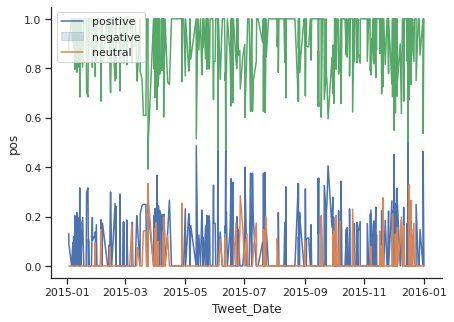

In [ ]:
pivot_df = grouped.reset_index().pivot(index='Tweet_Date', columns='Vader_sentiment', values='compound')

# Plot the sentiment scores for each sentiment category as a function of time
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(7, 5))
sns.despine(fig)
sns.lineplot(data=years_df[8], x='Tweet_Date', y='pos', ax=ax)
sns.lineplot(data=years_df[8], x='Tweet_Date', y='neg', ax=ax)
sns.lineplot(data=years_df[8], x='Tweet_Date', y='neu', ax=ax)
ax.legend(['positive', 'negative', 'neutral'], loc='upper left')
plt.show()

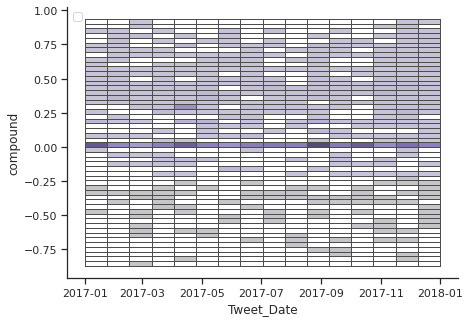

In [ ]:
sns.set_theme(style = "ticks")
fig, ax = plt.subplots(figsize = (7, 5))
sns.despine(fig)

sns.histplot(data = years_df[6],
             x ='Tweet_Date',
             y = 'compound',
             hue= 'Vader_sentiment',
             multiple="stack",
             palette="light:m_r",
             edgecolor=".3",
             linewidth=.5,
             )
ax.legend(loc='upper left')
plt.show()

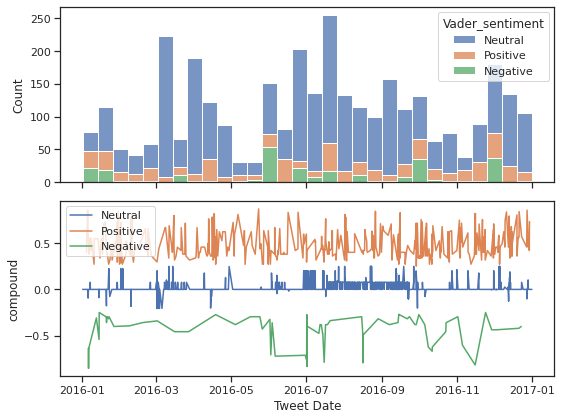

In [ ]:
sns.set_theme(style="ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

sns.histplot(data=years_df[7], x='Tweet_Date', hue='Vader_sentiment', multiple='stack', bins=30, ax=ax1)
ax1.set_xlabel('Tweet Date')
sns.lineplot(data=years_df[7], x='Tweet_Date', y='compound', hue='Vader_sentiment', ax=ax2)
ax2.set_xlabel('Tweet Date')

ax2.legend(loc='upper left')
fig.tight_layout()
plt.show()

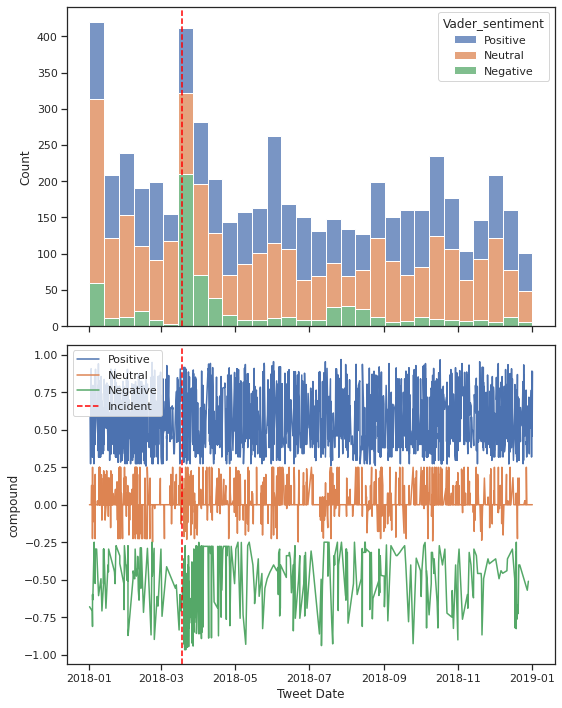

In [ ]:
sns.set_theme(style="ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

sns.histplot(data=years_df[5], x='Tweet_Date', hue='Vader_sentiment', multiple='stack', bins=30, ax=ax1)
ax1.set_xlabel('Tweet Date')
sns.lineplot(data=years_df[5], x='Tweet_Date', y='compound', hue='Vader_sentiment', ax=ax2)
ax2.set_xlabel('Tweet Date')

incident_date = pd.to_datetime('2018-03-18')
ax1.axvline(incident_date, color='red', linestyle='--', label = 'Incident')
ax2.axvline(incident_date, color='red', linestyle='--', label = 'Incident')
ax2.legend(loc='upper left')
fig.tight_layout()
plt.show()

In [ ]:
df1['keyword_query']

array(['(Driverless OR Without A Driver OR No Driver OR No Human OR No Operator OR Unmanned OR Uncrewed) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport)              lang:en',
       'Q2', 'Q5', 'Q1', 'Q3'], dtype=object)

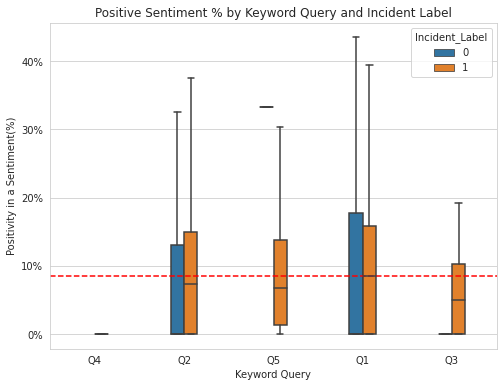

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

lab_map = {'(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q1',
        '(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q2' ,
        '(Computer Driven OR Computer Controlled OR Robot) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q3',
        '(Driverless OR Without A Driver OR No Driver OR No Human OR No Operator OR Unmanned OR Uncrewed) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport)              lang:en' : 'Q4',
        '(Self-Driving OR Self Drive) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q5'
          }

df_renamed = df1.set_index('keyword_query')
df_renamed = df_renamed.rename(index=lab_map)
df_renamed = df_renamed.reset_index()

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x= 'keyword_query', y='pos', hue='Incident_Label', data = df_renamed, width = 0.3, showfliers=False)

fmt = '%'
yticks = mtick.PercentFormatter(xmax=1.0, decimals=0, symbol=fmt)
ax.yaxis.set_major_formatter(yticks)

avg_value = df_renamed['pos'].mean()
ax.axhline(avg_value, color='red', linestyle='--')
plt.xlabel('Keyword Query')
plt.ylabel('Positivity in a Sentiment(%)')
plt.title('Positive Sentiment % by Keyword Query and Incident Label')
plt.show()

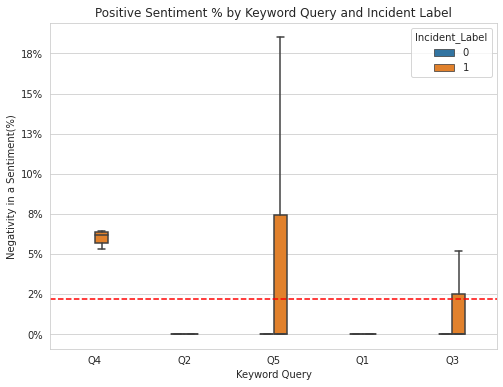

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x= 'keyword_query', y='neg', hue='Incident_Label', data = df_renamed, width = 0.3, showfliers=False)

fmt = '%'
yticks = mtick.PercentFormatter(xmax=1.0, decimals=0, symbol=fmt)
ax.yaxis.set_major_formatter(yticks)

avg_value = df_renamed['neg'].mean()
ax.axhline(avg_value, color='red', linestyle='--')
plt.xlabel('Keyword Query')
plt.ylabel('Negativity in a Sentiment(%)')
plt.title('Positive Sentiment % by Keyword Query and Incident Label')
plt.show()

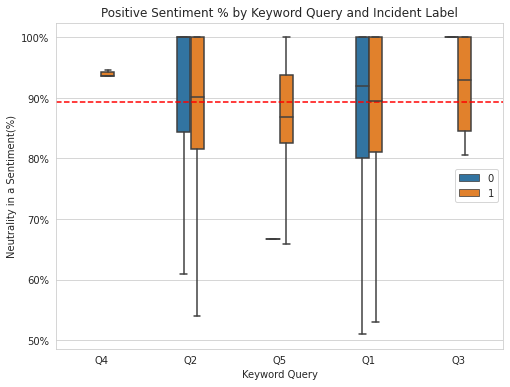

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x= 'keyword_query', y='neu', hue='Incident_Label', data = df_renamed, width = 0.3, showfliers=False)

fmt = '%'
yticks = mtick.PercentFormatter(xmax=1.0, decimals=0, symbol=fmt)
ax.yaxis.set_major_formatter(yticks)

avg_value = df_renamed['neu'].mean()
ax.axhline(avg_value, color='red', linestyle='--')
plt.xlabel('Keyword Query')
plt.ylabel('Neutrality in a Sentiment(%)')
plt.title('Positive Sentiment % by Keyword Query and Incident Label')

plt.legend(loc = 'center right')
plt.show()

In [ ]:
df_renamed

,keyword_query,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,Incident_Label,Vader_CleanTweet,Vader_sentiment,neg,neu,pos,compound
0,Q4,1543970431241097216,2022-07-04 14:50:11+00:00,CodeWriter23,5,0,@krankenschreibe @wil_da_beast630 4/\n137.04.C...,1,4/\n137.04.C Except as otherwise permitted b...,Negative,0.053,0.947,0.000,-0.2960
1,Q4,1536744779157053440,2022-06-14 16:18:01+00:00,Exacerbater1,0,0,@WDeepkimchi @Tim_Kiper @Timcast 2923.16 of th...,1,"2923.16 of the revised code.\n\n""(B) No per...",Negative,0.055,0.945,0.000,-0.2960
2,Q4,1536690787668434944,2022-06-14 12:43:28+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",1,"""(B) No person shall knowingly transport or...",Negative,0.062,0.937,0.000,-0.2960
3,Q4,1536687905497817089,2022-06-14 12:32:01+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",1,"""(B) No person shall knowingly transport or...",Negative,0.062,0.937,0.000,-0.2960
4,Q4,1328009560175546371,2020-11-15 16:18:47+00:00,EthereanTrading,0,0,@richardfowler @cleveland19news @MAJTOURE No p...,1,No person shall knowingly transport or have...,Negative,0.064,0.936,0.000,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30283,Q3,1054387124139683840,2018-10-22 15:00:54+00:00,BovansS,0,0,At Bovans Auto we use cutting edge technology ...,1,At Bovans Auto we use cutting edge technology ...,Positive,0.031,0.901,0.067,0.4019
30284,Q3,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,1,Year 5 are about to embark upon Control Techno...,Neutral,0.000,1.000,0.000,0.0000
30285,Q3,976396588498251776,2018-03-21 09:54:21+00:00,SwampYankeeTN,0,0,@GordonDeal Regarding self driving cars: This ...,1,Regarding self driving cars: This is technolo...,Positive,0.000,0.841,0.159,0.8070
30286,Q3,885681235065962496,2017-07-14 02:03:56+00:00,DaWholeTwuth,0,1,"Bye-bye, Firefly: Waymo retires its autonomous...",0,"Bye-bye, Firefly: Waymo retires its autonomous...",Neutral,0.000,1.000,0.000,0.0000
